In [3]:
options(warn=-1)
library(lattice)
library(Stat2Data)
library(mosaic)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggformula
Loading required package: ggplot2

New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Loading required package: Matrix

The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.

Note: If you use the Matrix package, be sure to load it BEFORE loading mosaic.

Attaching package: ‘mosaic’

The following object is masked from ‘package:Matrix’:

    mean

The following objects are masked from ‘package:dplyr’:

    count, do, tally

The following objects are masked from ‘pac

In [4]:
data(PorschePrice)

In [5]:
head(PorschePrice)

Price,Age,Mileage
69.4,3,21.5
56.9,3,43.0
49.9,2,19.9
47.4,4,36.0
42.9,4,44.0
36.9,6,49.8


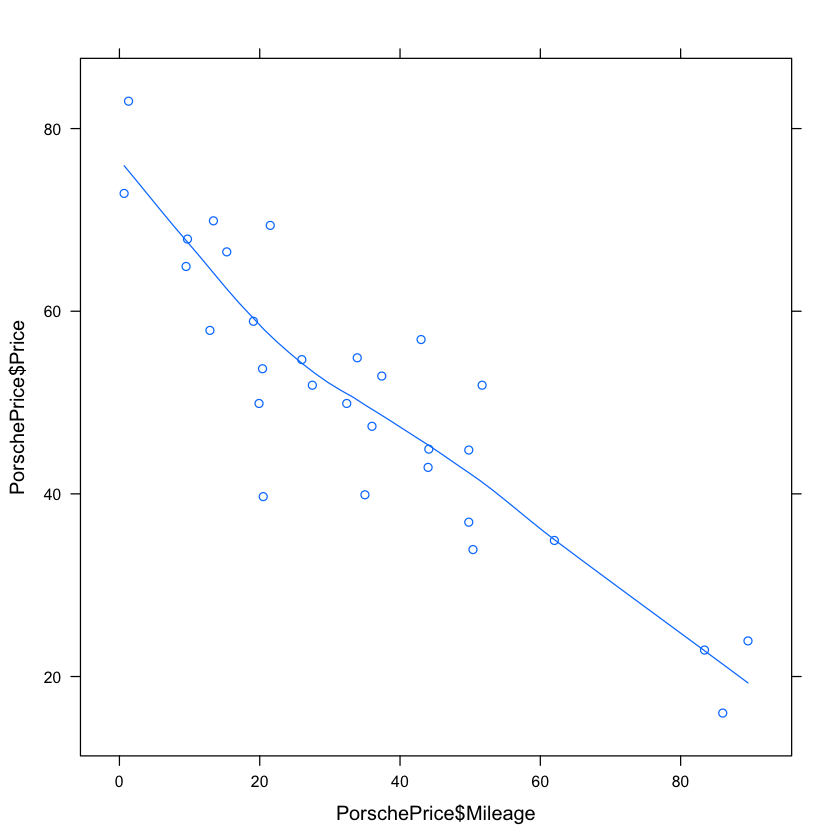

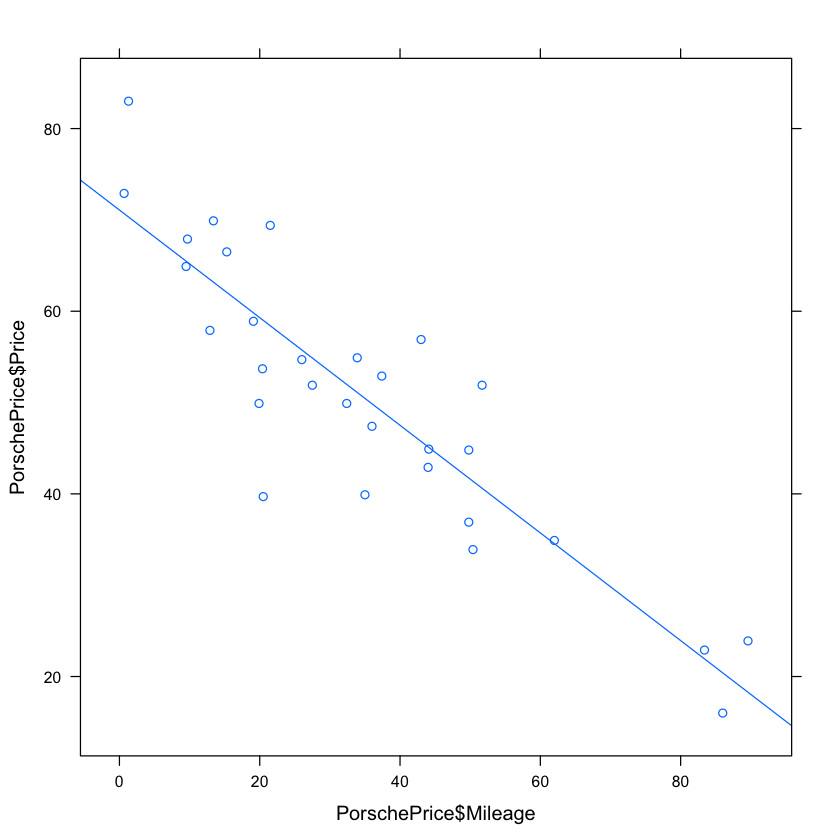

In [6]:
# Plots a smooth line that follows the data
xyplot(PorschePrice$Price ~ PorschePrice$Mileage, type=c('p', 'smooth'))
# Plots regression line 
xyplot(PorschePrice$Price ~ PorschePrice$Mileage, type=c('p', 'r'))

In [7]:
# Negative correlation as expected
cor(PorschePrice$Price, PorschePrice$Mileage) 

[1] -0.8913484

In [8]:
# Fits the linear regression model, produces intercept and coefficients 
Porsche.lm = lm(PorschePrice$Price ~ PorschePrice$Mileage)
Porsche.lm


Call:
lm(formula = PorschePrice$Price ~ PorschePrice$Mileage)

Coefficients:
         (Intercept)  PorschePrice$Mileage  
             71.0905               -0.5894  


Prediction equation: $\hat{y} = \beta_0 + \beta_1x$

In [9]:
# Predicted value of Porsche that has 20, 500 miles on it
print(71.0905 - .5894 * 20.5)

[1] 59.0078


In [10]:
actual = 39.7 # actual price for Porsche with 20, 500 miles on it
Residual = 39.7 - (71.0905 - .5894 * 20.5)
Residual

[1] -19.3078

In [11]:
msummary(Porsche.lm)

                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          71.09045    2.36986    30.0  < 2e-16 ***
PorschePrice$Mileage -0.58940    0.05665   -10.4 3.98e-11 ***

Residual standard error: 7.17 on 28 degrees of freedom
Multiple R-squared:  0.7945,	Adjusted R-squared:  0.7872 
F-statistic: 108.3 on 1 and 28 DF,  p-value: 3.982e-11

Interested p-value = 3.98e-11, but this is a two-sided p-value so we need to divide by 2, so it is 1.99e-11

"I have enough evidence to conclude that there is a negative association b/w the number of miles on a used Porsche and its price b/c p-value is very small (evidence)" - Dr. Garai 

# Starting here was from Jan. 31

In [12]:
SSE = sum(Porsche.lm$residuals^2)
n = length(PorschePrice$Price)

# We use n - 2 because we are estimating two parameters:
# the slope and the ...? 

# This is the predicted standard error
sigma_hat_residuals = sqrt(SSE / (n-2))

cat('The standard deviation of the residuals = ', sigma_hat_residuals)

The standard deviation of the residuals =  7.170289

In [13]:
# Checking that the predicted standard error is correct
summary(Porsche.lm)


Call:
lm(formula = PorschePrice$Price ~ PorschePrice$Mileage)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3077  -4.0470  -0.3945   3.8374  12.6758 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          71.09045    2.36986    30.0  < 2e-16 ***
PorschePrice$Mileage -0.58940    0.05665   -10.4 3.98e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.17 on 28 degrees of freedom
Multiple R-squared:  0.7945,	Adjusted R-squared:  0.7872 
F-statistic: 108.3 on 1 and 28 DF,  p-value: 3.982e-11


# Survey data for pick number b/w 1 and 100 and how to manually plot a QQ plot

<a href="http://onlinestatbook.com/2/advanced_graphs/q-q_plots.html">Online stat book link for QQ plot info and how to compute</a>

QQ Plot: $(p_i, u_i)$ for $i$ = 1, 2, ..., n, where $u_i$ is the value of the $i\text{th}$ value in the <strong>sorted</strong> data array (in the case below, this is `survey_data`) and $p_i$ is the proportion of values less than $u_i$ in the sorted data array (again `survey_data` in the case below)

In [51]:
survey_data = c(7, 10, 13, 16, 19, 27, 28, 30, 38, 45, 63, 66, 69, 73, 76, 77, 80, 97)
# Sort before finding # vals less than u_i
survey_data = sort(survey_data)

In [40]:
# Find each p_i (proportion of values less than u_i)
# seq_along returns the indices of the survey_array
p = lapply(seq_along(survey_data), function(index) {
   return((index - .5) / length(survey_data)) 
});

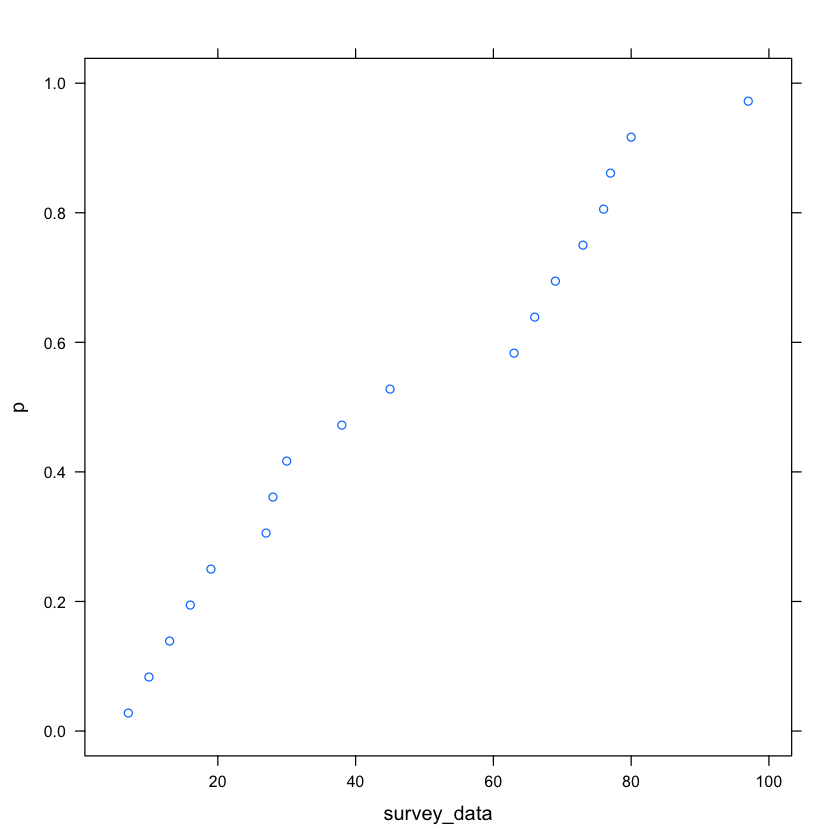

In [56]:
# Use xyplot to plot (p_i, u_i) for i = 1, 2, ..., n
xyplot(p ~ survey_data)